In [2]:
!pip install opencv-python

In [3]:
!pip install opencv-contrib-python==3.4.2.16

In [4]:
!pip install scikit-image

In [5]:
!pip install Image

  Created wheel for Image: filename=image-1.5.32-py2.py3-none-any.whl size=19478 sha256=2eae63fd90e15dc147cdb4a72d4c2b64e8e8c80677c13135401e03417a3ba954
  Stored in directory: c:\users\neha\appdata\local\pip\cache\wheels\50\c4\4f\ef3af6fd3543787c1f790a196c60ca2e7fdbfea5e2112157a2
Successfully built Image


In [6]:
!pip install scipy

In [7]:
import skimage
import cv2
import numpy as np

from PIL import Image, ImageFilter
from sklearn.feature_extraction import image

import matplotlib.pyplot as plt

In [9]:
img_stork =Image.open('datasets/bird.jpg')

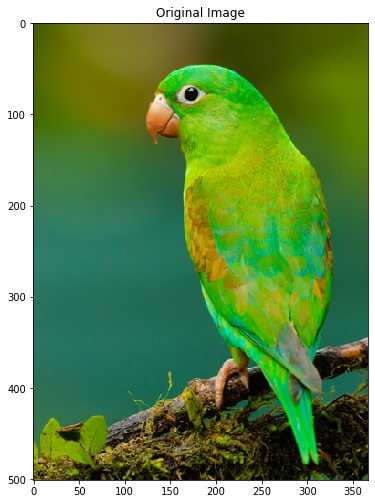

In [11]:
plt.figure(figsize=(6,12))

plt.imshow(img_stork)
plt.title('Original Image')
plt.show()

In [12]:
img_stork.format, img_stork.mode, img_stork.size

('JPEG', 'RGB', (367, 501))

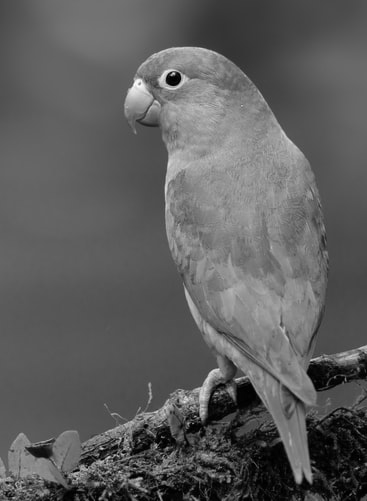

In [13]:
#converts image to grey scale
gs_image = img_stork.convert(mode='L')

gs_image

In [14]:
gs_image.size

(367, 501)

In [15]:
gs_image.mode

'L'

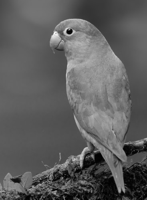

In [16]:
# in spite of giving the size, the aspect ratio of the image os maintained
gs_image.thumbnail((200,200))

gs_image

In [17]:
gs_image.size, img_stork.size

((147, 200), (367, 501))

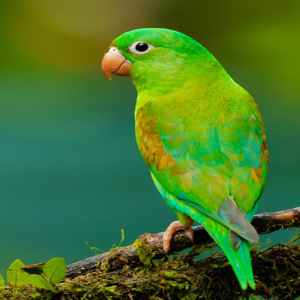

In [21]:
# here we lost the original aspect ratio
img_resize = img_stork.resize((300,300))

img_resize

In [22]:
img_resize.size

(300, 300)

In [24]:
hoz_flip = img_stork.transpose(Image.FLIP_LEFT_RIGHT)
ver_flip = img_stork.transpose(Image.FLIP_TOP_BOTTOM)

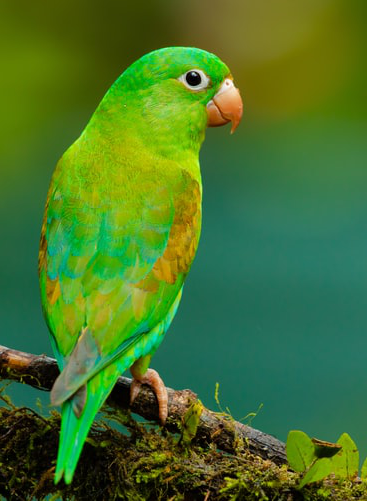

In [25]:
hoz_flip

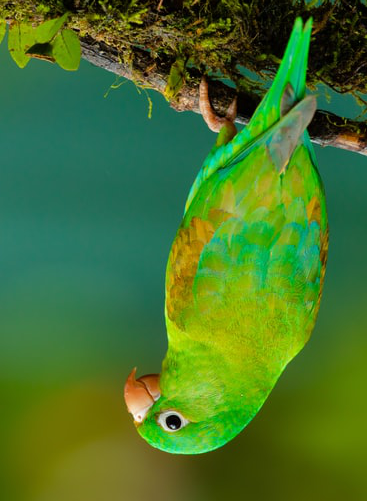

In [26]:
ver_flip

In [27]:
img_stork_arr = np.array(img_stork)
type(img_stork_arr)

numpy.ndarray

In [28]:
img_stork_arr.shape

(501, 367, 3)

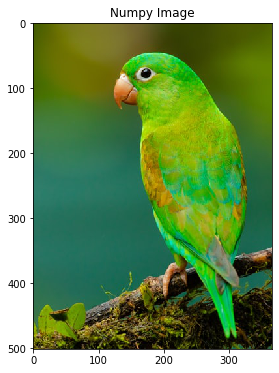

In [29]:
plt.figure(figsize=(6,6))
plt.title("Numpy Image")
plt.imshow(img_stork_arr, cmap='gray')

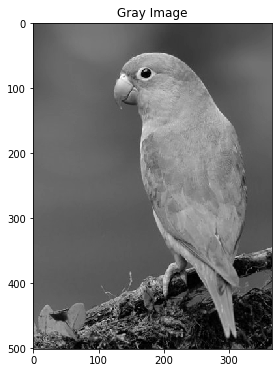

In [30]:
from skimage.color import rgb2gray

img_stork_arr_gray = rgb2gray(img_stork_arr)

plt.figure(figsize=(6,6))
plt.title("Gray Image")
plt.imshow(img_stork_arr_gray, cmap='gray')

In [31]:
img_stork_arr_gray.shape

(501, 367)

In [33]:
# anti-aliasing =True reduces distortions
from skimage.transform import resize

stork_resized = resize(img_stork_arr, (224,224), anti_aliasing=True)

stork_resized.shape

(224, 224, 3)

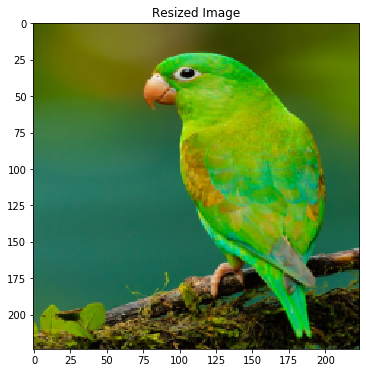

In [34]:
plt.figure(figsize=(6,6))
plt.title("Resized Image")
plt.imshow(stork_resized, cmap='gray')

In [35]:
img_stork_arr.shape

(501, 367, 3)

In [36]:
patches = image.extract_patches_2d(img_stork_arr, (64,64))

patches.shape

(133152, 64, 64, 3)

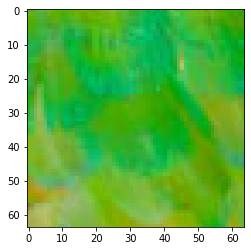

In [39]:
plt.imshow(patches[70450])
plt.show()

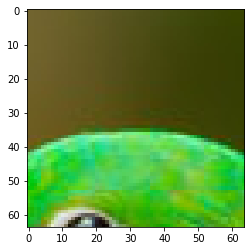

In [48]:
plt.imshow(patches[3500])
plt.show()

In [49]:
from skimage import data, io, filters

In [50]:
image = data.coins()
print(image)

[[ 47 123 133 ...  14   3  12]
 [ 93 144 145 ...  12   7   7]
 [126 147 143 ...   2  13   3]
 ...
 [ 81  79  74 ...   6   4   7]
 [ 88  82  74 ...   5   7   8]
 [ 91  79  68 ...   4  10   7]]


In [51]:
image.shape

(303, 384)

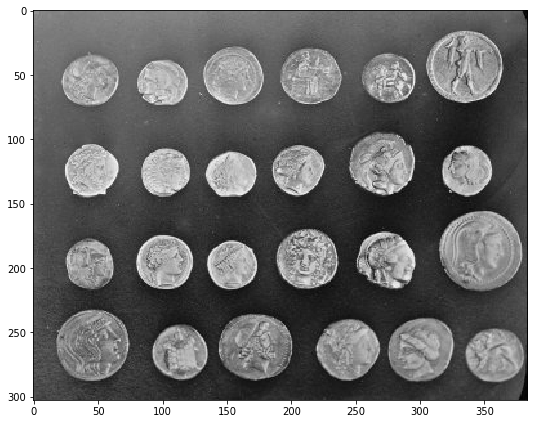

In [52]:
plt.figure(figsize=(12,6))
io.imshow(image)

plt.show()

In [53]:
# the sobel algo performs edge detection for us
edges = filters.sobel(image)

print(edges)

[[0.         0.         0.         ... 0.         0.         0.        ]
 [0.         0.17208326 0.04307036 ... 0.03683979 0.00765711 0.        ]
 [0.         0.06139791 0.02499519 ... 0.084638   0.00490196 0.        ]
 ...
 [0.         0.03114192 0.02949335 ... 0.01669548 0.00588235 0.        ]
 [0.         0.04030354 0.0335059  ... 0.00571662 0.00980392 0.        ]
 [0.         0.         0.         ... 0.         0.         0.        ]]


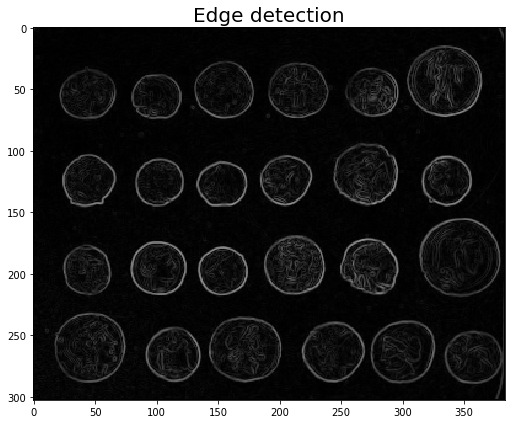

In [55]:
plt.figure(figsize=(12,6))
plt.title('Edge detection', fontsize=20)
io.imshow(edges)

plt.show()

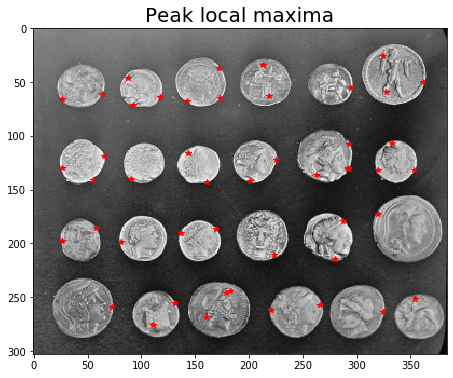

In [58]:
from skimage.feature import peak_local_max

coordinates = peak_local_max(image, min_distance=20)

fig, axes = plt.subplots(figsize=(12,6))
axes.imshow(image, cmap=plt.cm.gray)

axes.plot(coordinates[:, 1], coordinates[:,0], 'r*')
axes.set_title('Peak local maxima', fontsize=20)

plt.show()